# Heart Disease Prediction
I will be working on a dataset known as 'heart.csv' and will be using Machine Learning to predict whether any person is suffering from heart disease or not.

#Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#Variable Description :

age      : age of the person

sex      : gender (1: male, 0: female)

cp       : chest pain type (0:asymptomatic,1:typicalangina)

trestbps : resting blood pressure

chol     : serum cholestoral in mg/dl

fbs      : fasting blood sugar > 120 mg/dl (0:if<120,1:if>120)

restecg  : resting electrocardiographic results (0:normal,1:abnormal)

thalach  : maximum heart rate achieved

exang    : Exercise induced angina (1 = yes; 0 = no)

oldpeak  :  ST depression induced by exercise relative to rest

slope    : the slope of the peak exercise ST segment(0:upsloping,
1:flat2:downsloping)

ca       : number of major vessels (0-3) colored by flourosopy

thal     : thal=> 3=normal; 6 = fixed defect; 7 = reversable defect


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#DATA CLEANING :

In [ ]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#VISUALIZATION :

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f177ea0eed0>,
      dtype=object)

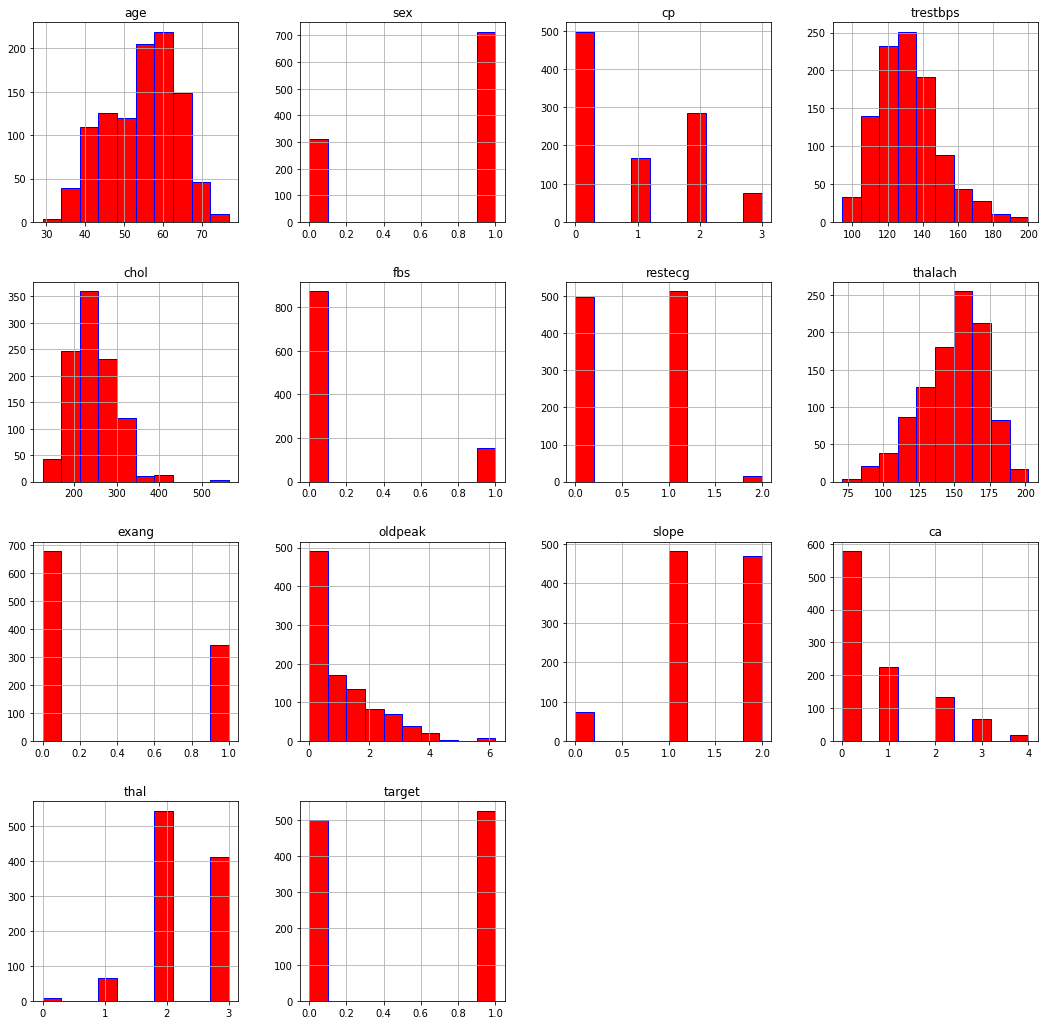

In [ ]:
df.hist(figsize=(18,18),facecolor='red',edgecolor='blue')  # face color is the color that will be displayed inside bins and edge colour is for bin borders

#Heart disease frequency for ages


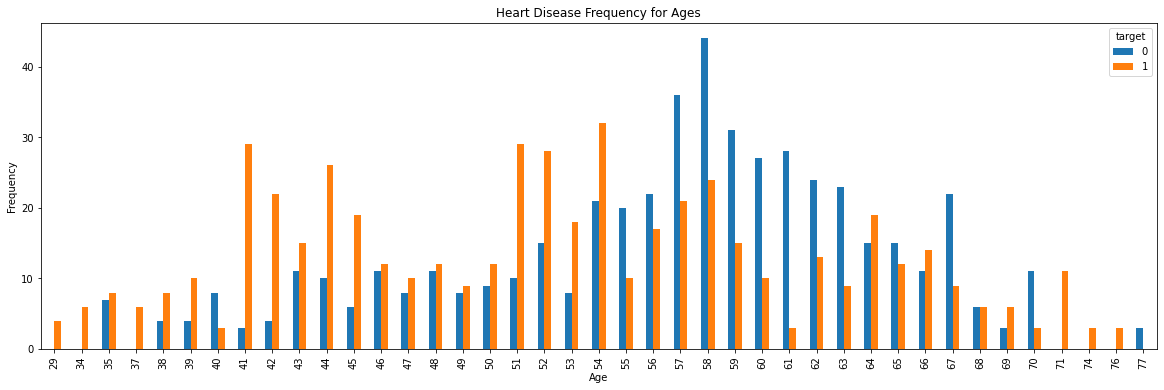

In [ ]:
pd.crosstab(df['age'],df['target']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

#Thalassemia vs cholesterol


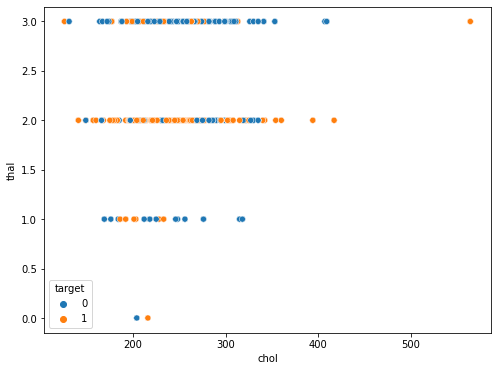

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thal',data=df,hue='target')  #Hue is used to group to multiple data variable and show the dependency of the passed data values are to be plotted
plt.show()


#Age vs Maximum heart disease rate


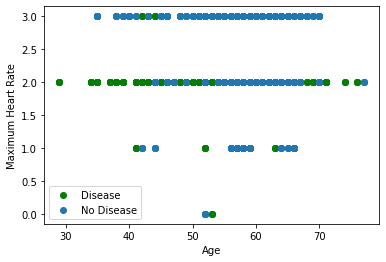

In [ ]:
plt.scatter(x=df['age'][df['target']==1], y=df['thal'][(df['target']==1)], c="green")  #if aged,and is suffering and also is suffering from thal
plt.scatter(x=df['age'][df['target']==0], y=df['thal'][(df['target']==0)])              #if aged,and is not suffering and also is suffering from thal
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

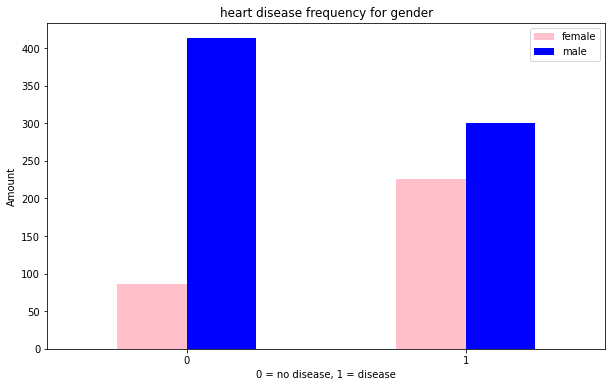

In [ ]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["pink","blue"])
plt.title("heart disease frequency for gender")
plt.xlabel("0 = no disease, 1 = disease")
plt.ylabel("Amount")                                       #separated bar plots like histograms, rotation=0 =>text label allign on x axis 
plt.legend(["female", "male"])
plt.xticks(rotation=0);

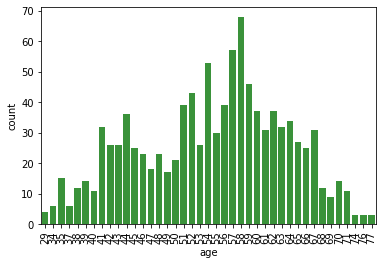

In [ ]:
base_color = sns.color_palette()[2]
sns.countplot(data = df, x = 'age', color = base_color)
plt.xticks(rotation=90);
#rotation=90 =>text label allign on x axis vertically

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


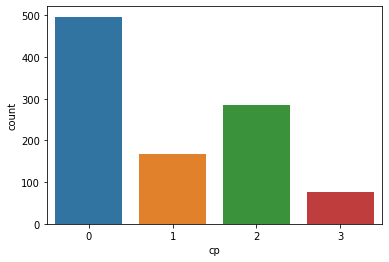

In [ ]:
sns.countplot(df['cp'])         # plotting a count bar plot
plt.show()

#Analyzing 'target' variable

In [ ]:
df["target"].describe()


count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [ ]:
df["target"].unique() # this is a classification type of problem

array([0, 1])

#Checking Correlation :

In [ ]:
print(df.corr()["target"].abs().sort_values(ascending=False))  # is used to get a Series/DataFrame with absolute numeric value of each element. This function only applies to elements that are all numeric

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


#EXPLORATORY DATA ANALYSIS :

1    526
0    499
Name: target, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


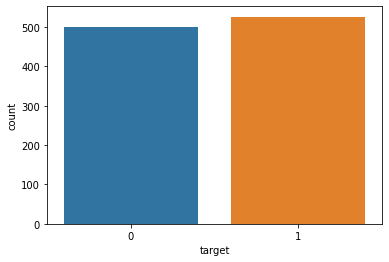

In [ ]:
p = df["target"]

sns.countplot(p)


target_temp = df.target.value_counts()

print(target_temp)

#Analysing other dependent features [ 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal']

#Analysing the 'Sex' feature

In [ ]:

df["sex"].unique()


array([1, 0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


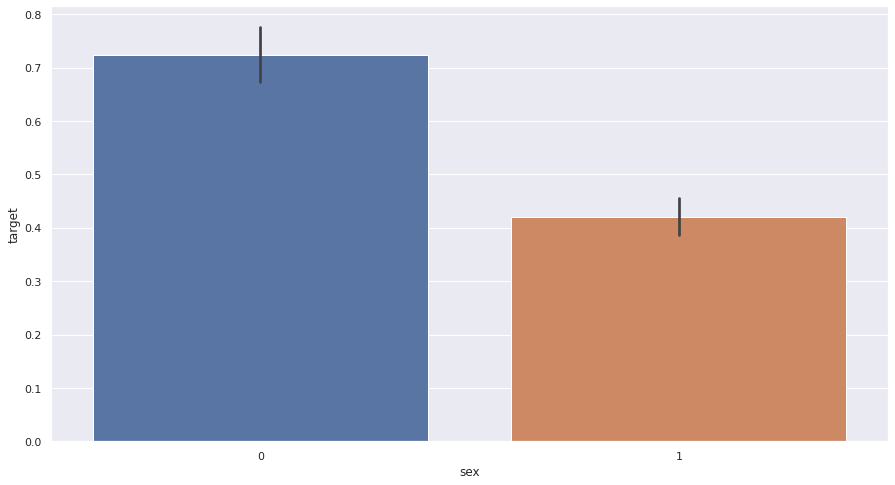

In [ ]:
sns.barplot(df["sex"],p)


we notice females are having more heart disease compared to male

#Analysing the 'Chest Pain Type' feature


In [ ]:
df["cp"].unique()


array([0, 1, 2, 3])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


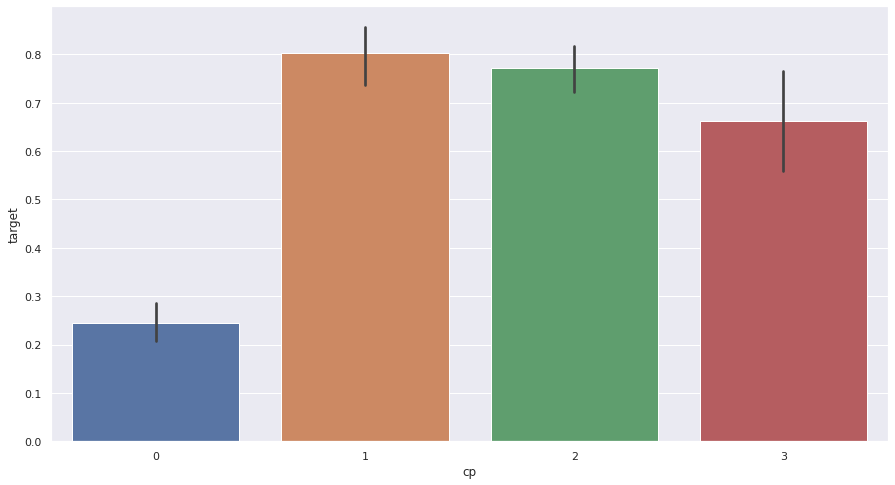

In [ ]:
sns.barplot(df["cp"],p)

we noice that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

#Analysing the FBS feature


In [ ]:
df["fbs"].describe()


count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

In [ ]:
df["fbs"].unique()


array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


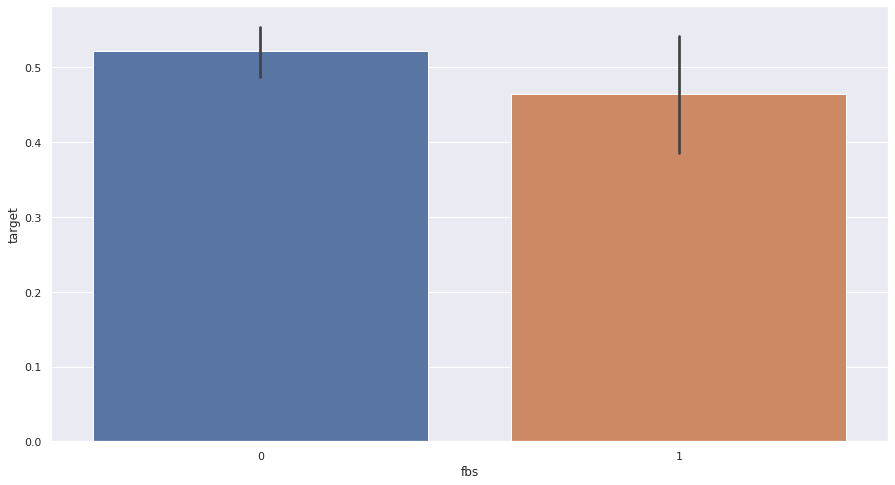

In [ ]:
sns.barplot(df["fbs"],p)  #fbs wrto target


here data is almost equally distributed

#Analysing the restecg feature


In [ ]:
df["restecg"].unique()


array([1, 0, 2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


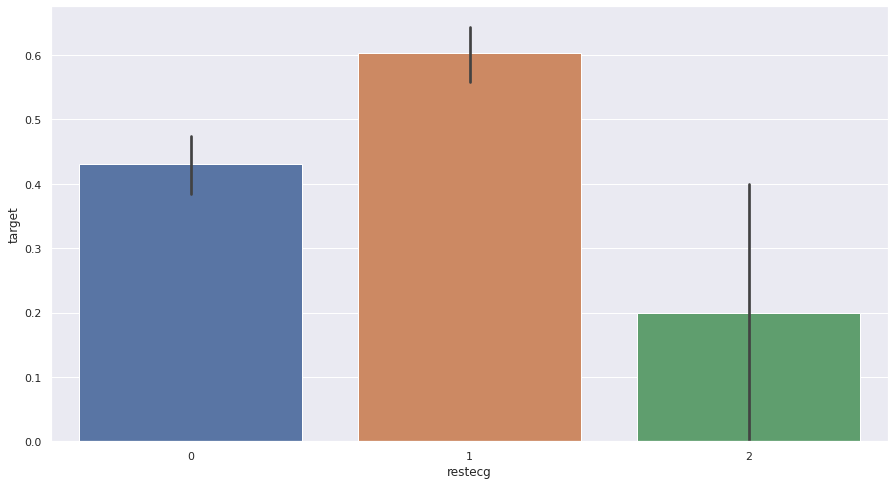

In [ ]:
sns.barplot(df["restecg"],p)  # restecg's wrto target


We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

#Analysing the 'exang' feature


In [ ]:
df["exang"].unique()


array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


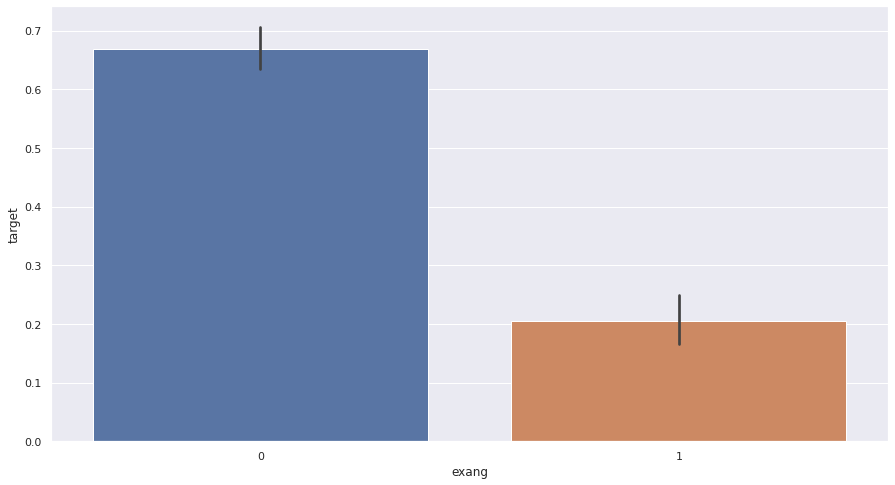

In [ ]:
sns.barplot(df["exang"],p)


People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems


#Analysing the Slope feature


In [ ]:
df["slope"].unique()


array([2, 0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


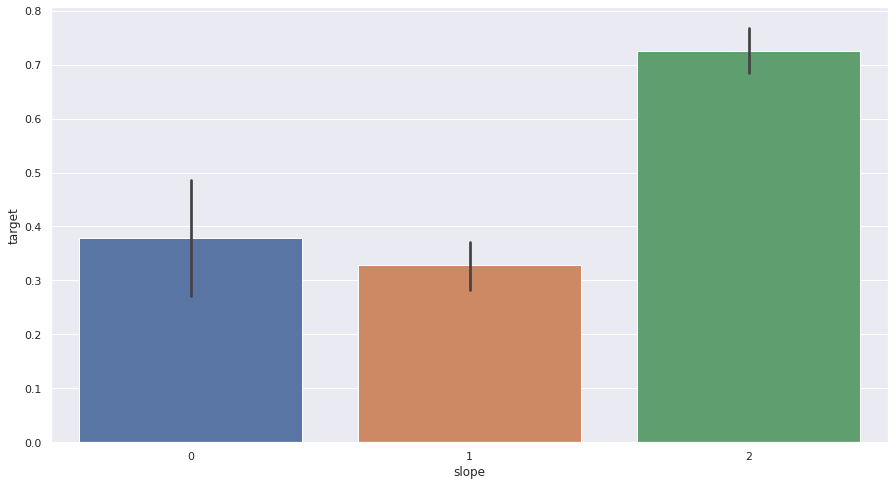

In [ ]:
sns.barplot(df["slope"],p)
# slope v/s target

We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

#Analysing the 'ca' feature


In [ ]:
df["ca"].unique()


array([2, 0, 1, 3, 4])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


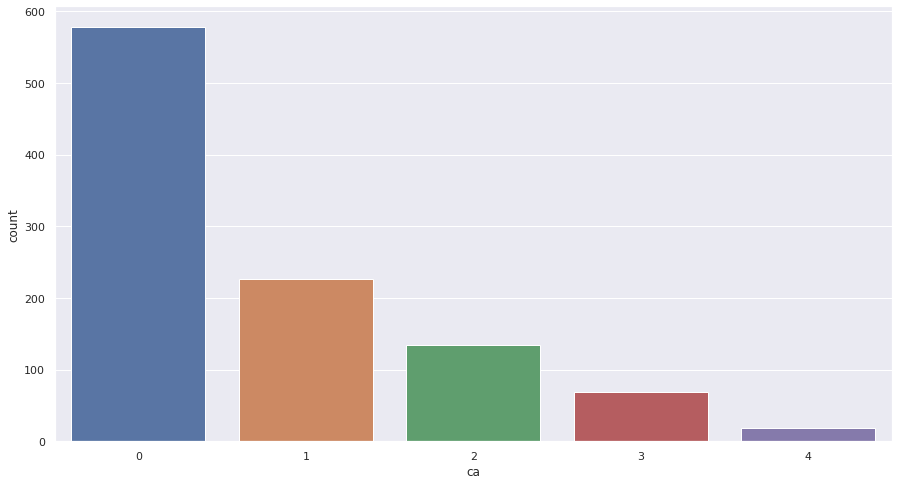

In [ ]:
sns.countplot(df["ca"])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


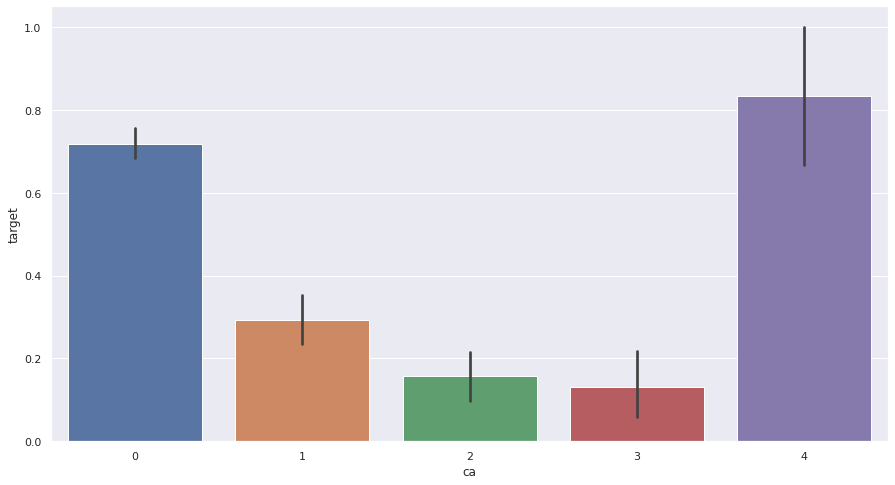

In [ ]:
sns.barplot(df["ca"],y)


ca=4 has large number of heart patients

#Analysing the 'thal' feature

In [ ]:
df["thal"].unique()


array([3, 2, 1, 0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


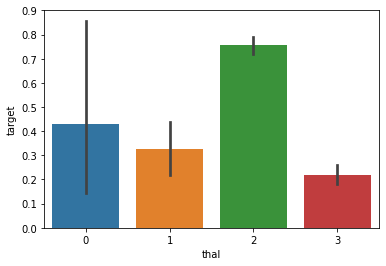

In [ ]:
sns.barplot(df["thal"],p)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


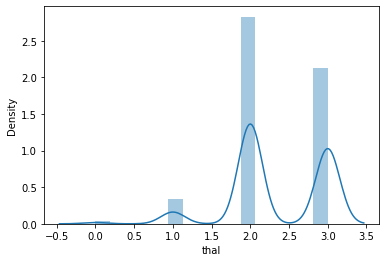

In [ ]:
sns.distplot(df["thal"])
#looking at the distribution

#FINDING CORRELATION AMONGST INDEPENDENT VARIABLES :

In [ ]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


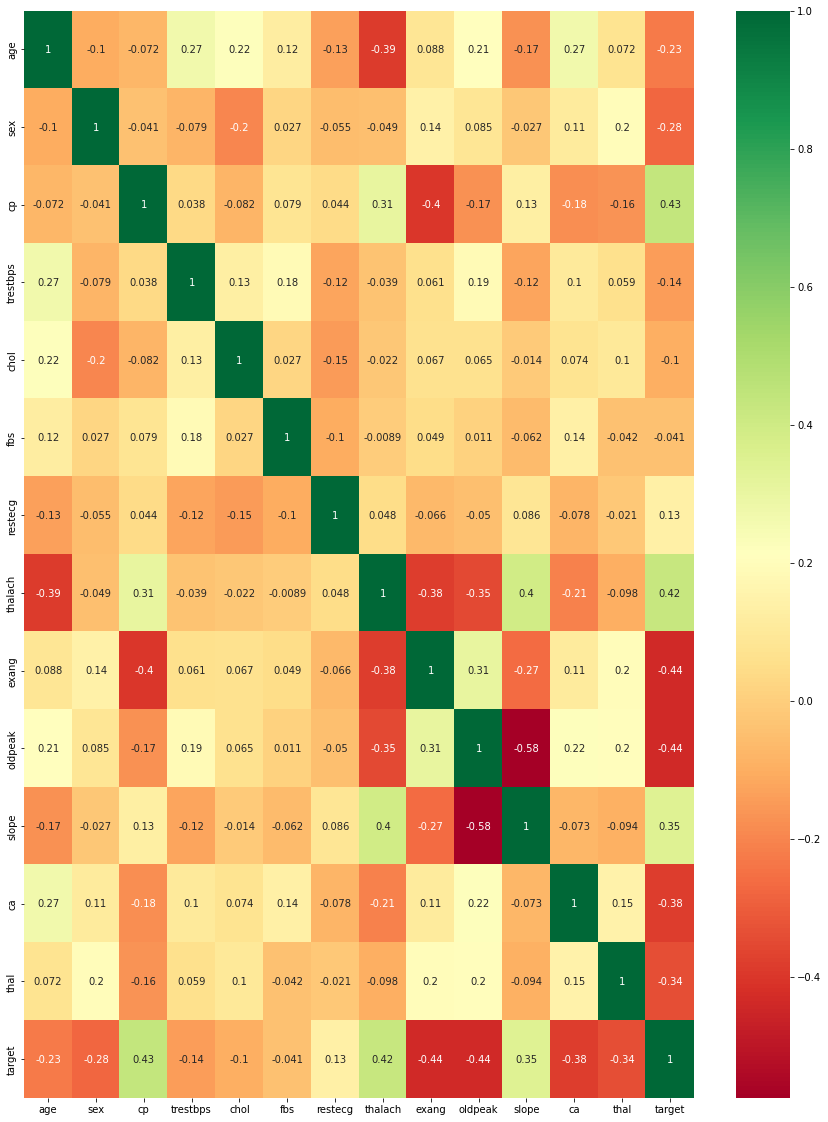

In [ ]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Maximum heart rate of patients with Heart Disease')

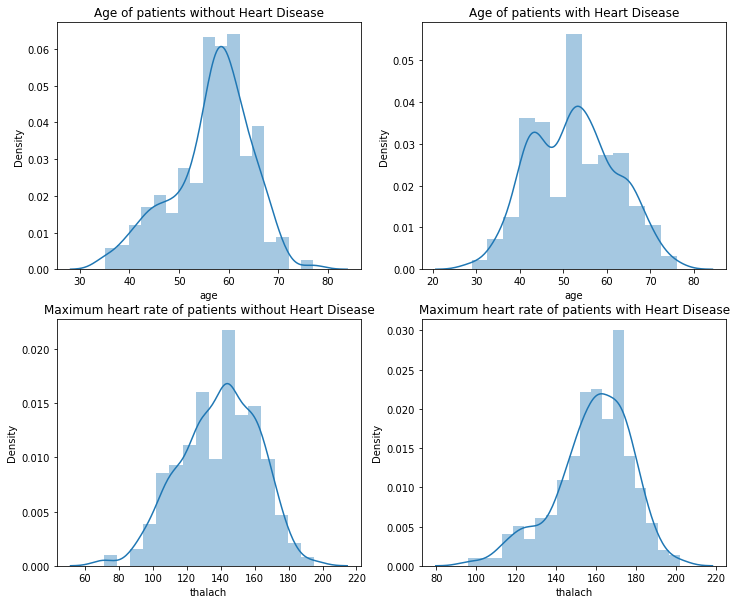

In [ ]:
# creating four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of patients without Heart Disease')

plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of patients with Heart Disease')

plt.subplot(223)
sns.distplot(df[df['target']==0].thalach)
plt.title('Maximum heart rate of patients without Heart Disease')

plt.subplot(224)
sns.distplot(df[df['target']==1].thalach)
plt.title('Maximum heart rate of patients with Heart Disease')

#Feature Selection :

In [ ]:
x = df.iloc[:,:-1]
# detecting most imp features
y = df.iloc[:,-1]
model= RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(x,y)
pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)

cp          0.139259
ca          0.114652
oldpeak     0.113493
thal        0.113394
thalach     0.110675
age         0.090599
chol        0.073795
trestbps    0.070420
exang       0.064955
slope       0.043933
sex         0.034966
restecg     0.019405
fbs         0.010453
dtype: float64

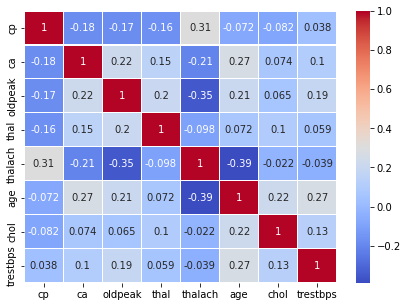

In [ ]:
nam=['cp','ca','oldpeak','thal','thalach','age','chol','trestbps']  # finding correlation amongst important features only

#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = df.loc[:,nam]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

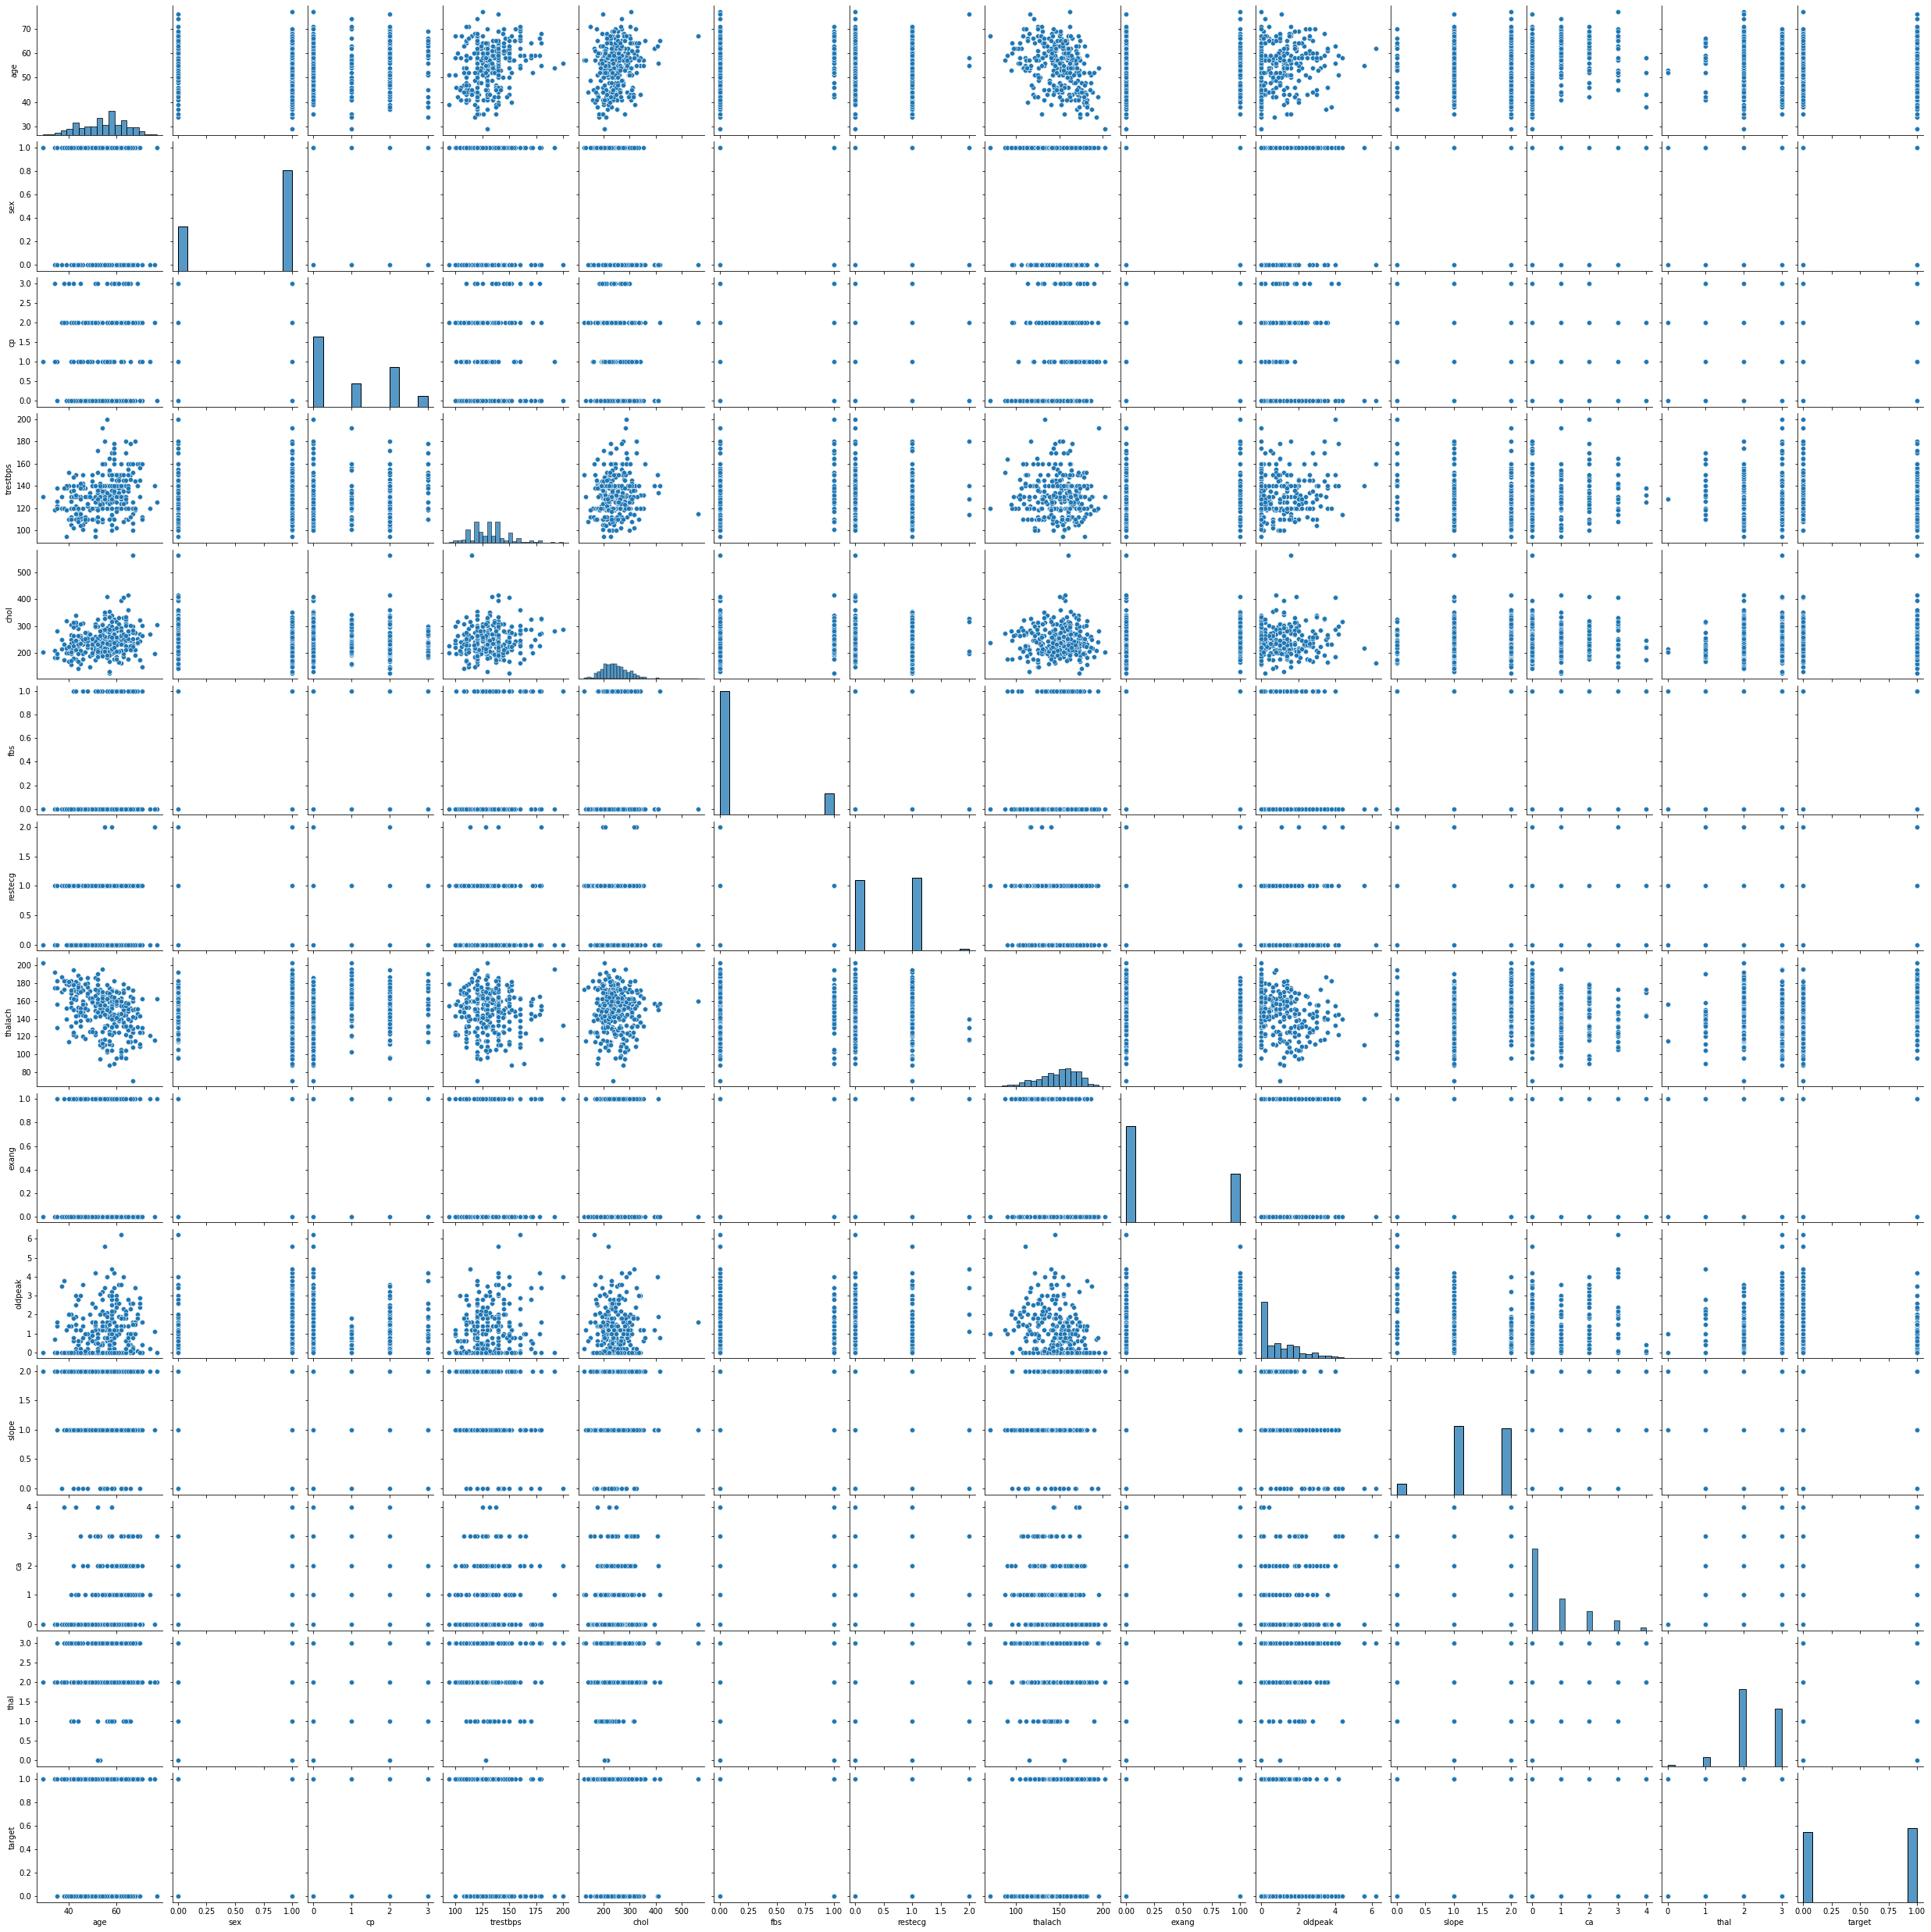

In [ ]:
sns.pairplot(df)

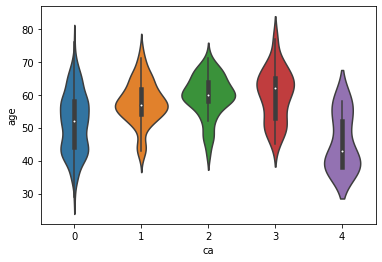

In [ ]:
sns.violinplot(x='ca', y='age', data=df)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


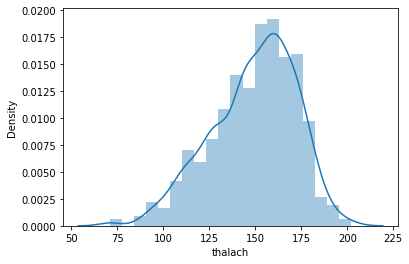

In [ ]:
sns.distplot(df['thalach'])


here this a left skewed data so it needs to be normalized

#BOX PLOT ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

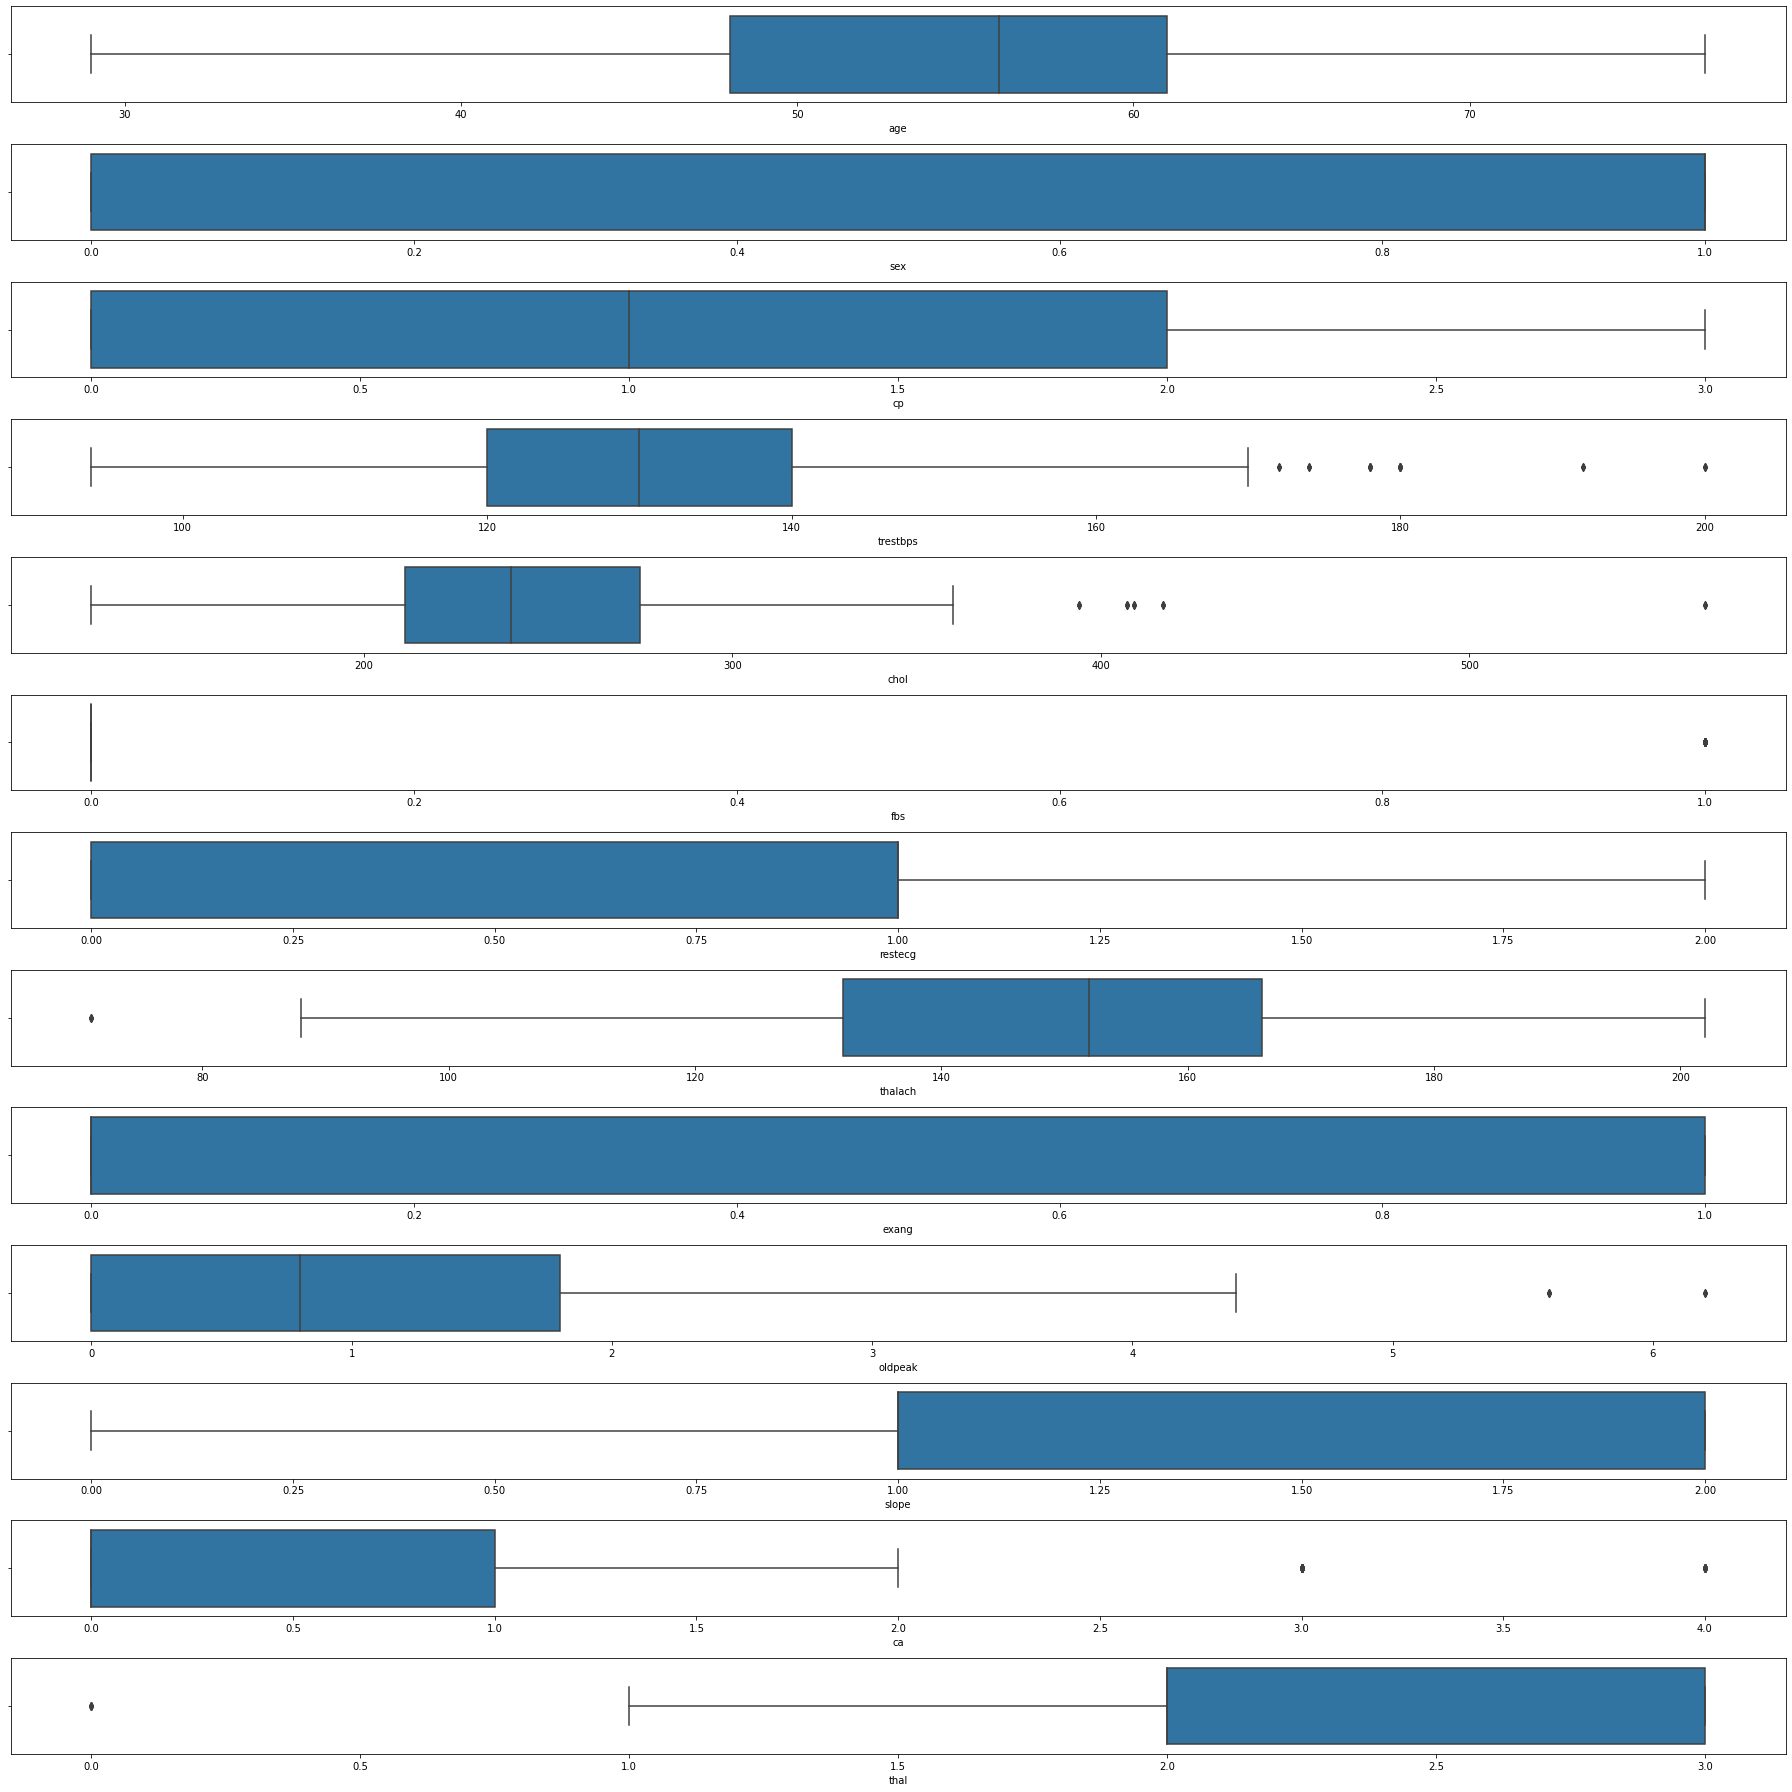

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(13, figsize = (25,25)) # 3 plots
plt1 = sns.boxplot(df['age'], ax = axs[0]) # 25 percentile is 74 refer above,...
plt2 = sns.boxplot(df['sex'], ax = axs[1])
plt3 = sns.boxplot(df['cp'], ax = axs[2])
plt4 = sns.boxplot(df['trestbps'], ax = axs[3])
plt5 = sns.boxplot(df['chol'], ax = axs[4])
plt6 = sns.boxplot(df['fbs'], ax = axs[5])
plt7 = sns.boxplot(df['restecg'], ax = axs[6])
plt8 = sns.boxplot(df['thalach'], ax = axs[7])
plt9 = sns.boxplot(df['exang'], ax = axs[8])
plt10 = sns.boxplot(df['oldpeak'], ax = axs[9])
plt11 = sns.boxplot(df['slope'], ax = axs[10])
plt12 = sns.boxplot(df['ca'], ax = axs[11])
plt13 = sns.boxplot(df['thal'], ax = axs[12])

plt.tight_layout()

Since there are not much outliers that can alter/deviate data , ignore it

#Normailzing Categorical data using One Hot Encoding


In [ ]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [ ]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.479107,-0.484803,0.647366,-0.912329,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
1021,0.613800,-0.377636,0.232705,-0.352873,1.471705,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1022,-0.819834,-1.234378,0.562371,-1.353113,-0.060888,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1023,-0.488996,-1.234378,0.155137,0.429923,-0.912329,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1025 non-null   float64
 1   trestbps   1025 non-null   float64
 2   chol       1025 non-null   float64
 3   thalach    1025 non-null   float64
 4   oldpeak    1025 non-null   float64
 5   target     1025 non-null   int64  
 6   sex_0      1025 non-null   uint8  
 7   sex_1      1025 non-null   uint8  
 8   cp_0       1025 non-null   uint8  
 9   cp_1       1025 non-null   uint8  
 10  cp_2       1025 non-null   uint8  
 11  cp_3       1025 non-null   uint8  
 12  fbs_0      1025 non-null   uint8  
 13  fbs_1      1025 non-null   uint8  
 14  restecg_0  1025 non-null   uint8  
 15  restecg_1  1025 non-null   uint8  
 16  restecg_2  1025 non-null   uint8  
 17  exang_0    1025 non-null   uint8  
 18  exang_1    1025 non-null   uint8  
 19  slope_0    1025 non-null   uint8  
 20  slope_1 

#separating X to hold Target variable(dependent col) 
#Y contains all dependent cols


In [ ]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [ ]:
X


,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.479107,-0.484803,0.647366,-0.912329,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
1021,0.613800,-0.377636,0.232705,-0.352873,1.471705,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1022,-0.819834,-1.234378,0.562371,-1.353113,-0.060888,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1023,-0.488996,-1.234378,0.155137,0.429923,-0.912329,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [ ]:
y


0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

#*Splitting* the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 30) (820, 30) (205, 30)


#Applying K-Nearest-Neighbour Algorithm
here we are testing for k values to be from 1-10

In [ ]:
from sklearn.model_selection import cross_val_score
knn_scores = []  # creating empty list
for k in range(1,21):
    knn_classifier1 = KNeighborsClassifier(n_neighbors = k)
    k_pred=knn_classifier1.fit(X_train, Y_train)  #model fitting
    knn_scores.append(knn_classifier1.score(X_test, Y_test)) # appending knn scores to list

knn_scores

[0.9853658536585366,
 0.9658536585365853,
 0.926829268292683,
 0.8585365853658536,
 0.8,
 0.8,
 0.8097560975609757,
 0.8146341463414634,
 0.824390243902439,
 0.8195121951219512,
 0.8195121951219512,
 0.824390243902439,
 0.8195121951219512,
 0.8146341463414634,
 0.824390243902439,
 0.8097560975609757,
 0.8195121951219512,
 0.8146341463414634,
 0.8195121951219512,
 0.8146341463414634]

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

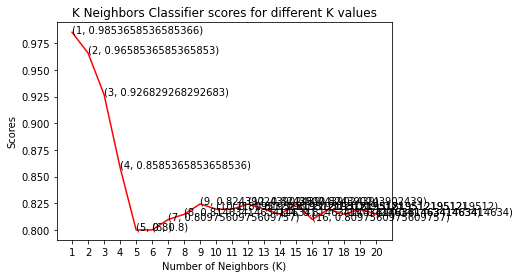

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):  #here we are searching knn scores randomly between 1 to 21 values of k
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')


#from plot we are obtaining maximum accurate score at k = 1 with maximum KNN score of 98.536

In [ ]:
modelkn = KNeighborsClassifier(n_neighbors=1) #with 1 neighbour we get max score 
modelkn.fit(X_train,Y_train) # fit for that score
kn_pred = modelkn.predict(X_test) # ptredicting in form of array

print("Accuracy Score:",accuracy_score(Y_test,kn_pred))

Accuracy Score: 0.9853658536585366


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 1)
scorekn=cross_val_score(knn_classifier,X,y,cv=10)   # cross validation/standard accuracy
scorekn.mean()*100


99.41176470588235

In [ ]:
CM = pd.crosstab(Y_test, k_pred)  # to obtain predicted result for k = 20
CM

col_0,KNeighborsClassifier(n_neighbors=20)
target,
0,102
1,103


#Applying RandomForest Classifier Algorithm :

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest_classifier= RandomForestClassifier(n_estimators=10)    # obtaining cross validation score

scorerand=cross_val_score(randomforest_classifier,X,y,cv=10)

scorerand.mean()*100



99.2185417856463

BY TEST AND SPLIT DATA :

In [ ]:
rc = RandomForestClassifier(random_state=0) # calling randomforestclassifier funcn with no states
rc.fit(X_train,Y_train)

rc_pred = rc.predict(X_test)
print(mean_squared_error(rc_pred,Y_test))  # mse , needs to be low
print(accuracy_score(Y_test,rc_pred)*100
      )

0.014634146341463415
98.53658536585365


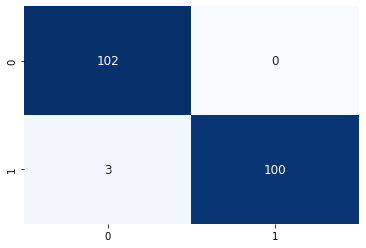

In [ ]:
cm = confusion_matrix(Y_test,rc_pred)
sns.heatmap(cm,annot = True,cmap='Blues',fmt='d',cbar=False,annot_kws={'size':
                                                                       12})
plt.show()

In [ ]:
CM = pd.crosstab(Y_test, rc_pred)
CM

col_0,0,1
target,,
0,102,0
1,3,100


In [ ]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]  # obtaining true positive negative , false +ve,-ve
TP=CM.iloc[1,1]

In [ ]:
score_rc=((TP+TN)*100)/(TP+TN+FP+FN)
score_rc   # using formulaes

98.53658536585365

In [ ]:
# check false negative rate of the model
fnrrc=FN*100/(FN+TP) # false negative rate which can affect model needs to be low
fnrrc

2.912621359223301

#Test Model

In [ ]:
category = ['No you dont have Heart disease','Yes you have Heart disease'] 
custom_data = np.array([[60,125,258,141,2.8,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1]])  # in reality person of id 1021 doesn't have disease , this is input in form of age,...,thal_0,thal_1 like by using one hot encoding

custom_data_prediction_dt =rc.predict(custom_data)

print(category[int(custom_data_prediction_dt)])

No you dont have Heart disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(classification_report(Y_test,rc_pred))  # printing recall,accuracy

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
rc_pred[:10] # getting last 10 predictions

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0])

#Applying DecisionTree Classifier Algorithm 

In [ ]:
dtc = DecisionTreeClassifier(criterion = 'entropy' , random_state = 0 ) # entropy coz to get info on how good is the split
dtc.fit(X_train , Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = dtc.predict(X_test)
y_pred[:8
       ]

array([1, 0, 0, 1, 0, 1, 0, 0])

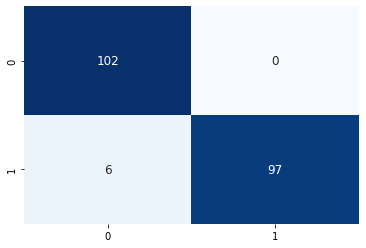

In [ ]:
cm = confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot = True,cmap='Blues',fmt='d',cbar=False,annot_kws={'size':
                                                                    12})      #heatmap confusion matrix
                                                                    
plt.show()

from confusion matrix we are getting true positive,true negative values to be high i.e right diagonal(blue) contents and false negative,false positive values to be low which is significantly good

In [ ]:
print(classification_report(Y_test,y_pred))  # accuracy of around 97% !!

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       102
           1       1.00      0.94      0.97       103

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



In [ ]:
print(mean_squared_error(Y_test,y_pred))

0.02926829268292683


In [ ]:
CM = pd.crosstab(Y_test, y_pred)
CM

col_0,0,1
target,,
0,102,0
1,6,97


In [ ]:
#let us save TP, TN, FP, FN
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [ ]:
#check accuracy of model
score_dt=((TP+TN)*100)/(TP+TN+FP+FN)
score_dt

97.07317073170732

In [ ]:
# check false negative rate of the model
fnr=FN*100/(FN+TP)
fnr

5.825242718446602

#Test Model :

In [ ]:
category = ['No you dont have Heart disease','Yes you have Heart disease'] 
custom_data = np.array([[60,125,258,141,2.8,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1]])  # in reality person of id 1021 doesn't have disease

custom_data_prediction_dt = dtc.predict(custom_data)

print(category[int(custom_data_prediction_dt)])


No you dont have Heart disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


#LOGISTIC REGRESSION ALGORITHM :

In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression()

#Model Evaluation: Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score on Training data : ', training_data_accuracy)

Accuracy score on Training data :  0.8829268292682927


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(test_data_accuracy)

0.8195121951219512


In [ ]:
print('Accuracy score on Test data by Logistic Regression : ', test_data_accuracy)

Accuracy score on Test data :  0.8195121951219512


In [ ]:

#this is input of 1021 id patient in form of  (age,trestbps,chol,thalch,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3)
input_data = (60,125,258,141,2.8,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
mean_squared_error(Y_test,X_test_prediction)

0.18048780487804877

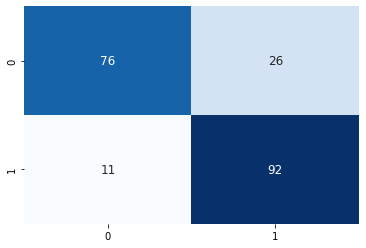

In [ ]:
cm = confusion_matrix(Y_test,X_test_prediction)
sns.heatmap(cm,annot = True,cmap='Blues',fmt='d',cbar=False,annot_kws={'size':
                                                                       12})
plt.show()  # true positive/negative are higher

In [ ]:
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80       102
           1       0.78      0.89      0.83       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



In [ ]:
CM=pd.crosstab(Y_test,X_test_prediction)
CM

col_0,0,1
target,,
0,76,26
1,11,92


In [ ]:
#let us save TP, TN, FP, FN
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [ ]:
#check accuracy of model
score_lr=((TP+TN)*100)/(TP+TN+FP+FN)
score_lr

81.95121951219512

In [ ]:
# check false negative rate of the model
fnrlr=FN*100/(FN+TP)
fnrlr

10.679611650485437

##SVM CLASSIFIER ALGORITHM :


In [ ]:
sv = SVC()
sv.fit(X_train,Y_train)

sv_pred = sv.predict(X_test)
print("MSE  BY SVM: ",mean_squared_error(Y_test,sv_pred))
print("ACCURACY BY SVM:",accuracy_score(Y_test,sv_pred))


MSE  BY SVM:  0.11707317073170732
ACCURACY BY SVM: 0.8829268292682927


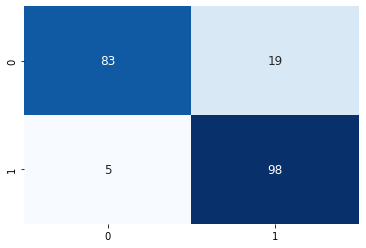

In [ ]:
cm = confusion_matrix(Y_test,sv_pred)
sns.heatmap(cm,annot = True,cmap='Blues',fmt='d',cbar=False,annot_kws={'size':
                                                                       12})
plt.show()  # true positive/negative are highe

In [ ]:
print(classification_report(Y_test,sv_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       102
           1       0.84      0.95      0.89       103

    accuracy                           0.88       205
   macro avg       0.89      0.88      0.88       205
weighted avg       0.89      0.88      0.88       205



In [ ]:
CM=pd.crosstab(Y_test,sv_pred)
CM

col_0,0,1
target,,
0,83,19
1,5,98


In [ ]:
#let us save TP, TN, FP, FN
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [ ]:
#check accuracy of model
score_sv=((TP+TN)*100)/(TP+TN+FP+FN)
score_sv

88.29268292682927

In [ ]:
# check false negative rate of the model
fnrsv=FN*100/(FN+TP)
fnrsv

4.854368932038835

#MODEL TEST

In [ ]:
category = ['No you dont have Heart disease','Yes you have Heart disease'] 
custom_data = np.array([[60,125,258,141,2.8,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1]])  # in reality person of id 1021 doesn't have disease

custom_data_prediction_dt = sv.predict(custom_data)

print(category[int(custom_data_prediction_dt)])

No you dont have Heart disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


#Using Gaussian naive-bias :

In [ ]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

Accuracy Score: 0.7658536585365854


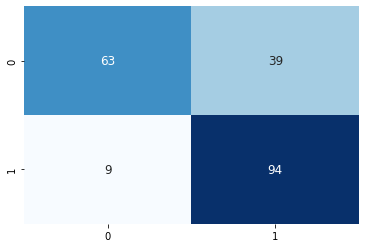

In [ ]:
cm = confusion_matrix(Y_test,y_pred3)
sns.heatmap(cm,annot = True,cmap='Blues',fmt='d',cbar=False,annot_kws={'size':
                                                                       12})
plt.show()  # true positive/negative are highe

In [ ]:
print(classification_report(Y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.62      0.72       102
           1       0.71      0.91      0.80       103

    accuracy                           0.77       205
   macro avg       0.79      0.77      0.76       205
weighted avg       0.79      0.77      0.76       205



In [ ]:
CM=pd.crosstab(Y_test,y_pred3)
CM

col_0,0,1
target,,
0,63,39
1,9,94


In [ ]:
#let us save TP, TN, FP, FN
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [ ]:
#check accuracy of model
score_nb=((TP+TN)*100)/(TP+TN+FP+FN)
score_nb

76.58536585365853

In [ ]:
# check false negative rate of the model
fnr=FN*100/(FN+TP)
fnr

8.737864077669903

#Test Model

In [ ]:
category = ['No you dont have Heart disease','Yes you have Heart disease'] 
custom_data = np.array([[60,125,258,141,2.8,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1]])  # in reality person of id 1021 doesn't have disease

custom_data_prediction_dt = model3.predict(custom_data)

print(category[int(custom_data_prediction_dt)])

No you dont have Heart disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


#Using Xgboost:


In [ ]:
import xgboost as xgb
xgmod = xgb.XGBClassifier(random_state=1)
xgmod.fit(X_train, Y_train)
y_pred5 = xgmod.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

Accuracy Score: 0.9365853658536586


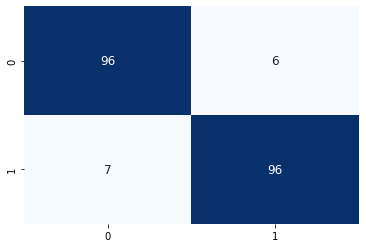

In [ ]:
cm = confusion_matrix(Y_test,y_pred5)
sns.heatmap(cm,annot = True,cmap='Blues',fmt='d',cbar=False,annot_kws={'size':
                                                                       12})
plt.show()  # true positive/negative are highe

In [ ]:
print(classification_report(Y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       102
           1       0.94      0.93      0.94       103

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



In [ ]:
CM=pd.crosstab(Y_test,y_pred5)
CM

col_0,0,1
target,,
0,96,6
1,7,96


In [ ]:
#let us save TP, TN, FP, FN
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [ ]:
#check accuracy of model
score_xg=((TP+TN)*100)/(TP+TN+FP+FN)
score_xg

93.65853658536585

In [ ]:
# check false negative rate of the model
fnr=FN*100/(FN+TP)
fnr

6.796116504854369

#CONCLUSION

In [ ]:
print("ACCURACY SCORE BY RANDOM FOREST ALGO        : "+str(accuracy_score(Y_test,rc_pred)*100)+" %")
print("ACCURACY SCORE BY SVM ALGO                  :"+str(accuracy_score(Y_test,sv_pred)*100)+" %")
print("ACCURACY SCORE BY LOGISTIC REGRESSION ALGO  : "+str(test_data_accuracy*100)+" %")
print("ACCURACY SCORE BY KNN ALGO                  : "+str(accuracy_score(Y_test,kn_pred)*100)+" %")
print("ACCURACY SCORE BY XGBOOST ALGO              :"+str(accuracy_score(Y_test,y_pred5)*100)+" %")
print("ACCURACY SCORE BY GAUSSIAN-NB ALGO          :"+str(accuracy_score(Y_test,y_pred3)*100)+" %")
print("ACCURACY SCORE BY DECISSION TREE ALGO       :"+str(accuracy_score(Y_test,y_pred)*100)+" %")




ACCURACY SCORE BY RANDOM FOREST ALGO        : 98.53658536585365 %
ACCURACY SCORE BY SVM ALGO                  :88.29268292682927 %
ACCURACY SCORE BY LOGISTIC REGRESSION ALGO  : 81.95121951219512 %
ACCURACY SCORE BY KNN ALGO                  : 98.53658536585365 %
ACCURACY SCORE BY XGBOOST ALGO              :93.65853658536587 %
ACCURACY SCORE BY GAUSSIAN-NB ALGO          :76.58536585365854 %
ACCURACY SCORE BY DECISSION TREE ALGO       :97.07317073170731 %


In [ ]:
score_lr = test_data_accuracy*100
score_nb = accuracy_score(Y_test,y_pred3)*100
score_svm = accuracy_score(Y_test,sv_pred)*100
score_knn = accuracy_score(Y_test,kn_pred)*100
score_dt =  accuracy_score(Y_test,y_pred)*100
score_xgb = accuracy_score(Y_test,y_pred5)*100
score_rf = accuracy_score(Y_test,rc_pred)*100

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


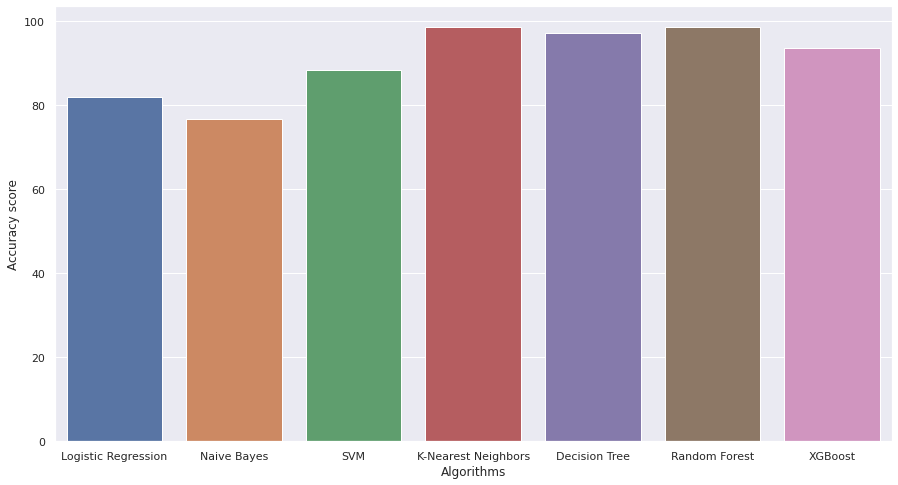

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","SVM","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]    

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

#hence K nearest,random forest are best in this case, further hyper tuning of parameters can be done to improve perfomance